In [18]:
import graphvizDrawTree as gvz

# ARBRE AVL

In [19]:
class ArbreBinaire:
    def __init__(self, cle, gauche = None, droite=None, hauteur=1):
        self.cle = cle
        self.gauche = gauche
        self.droite = droite
        self.hauteur = 1

In [20]:
class ArbreAVL:
    def __init__(self):
        self.racine = None
    
    ## AJOUT
    
    def ajout_liste(self, cles : list) -> 'ArbreAVL':
        '''AVL * int list -> ArbreAVL'''
        '''Ajoute une liste de clés à l'arbre binaire'''
        avl = self
        for cle in cles:
            avl = avl.ajout(cle)
        return avl
    
    def ajout(self, cle : int) -> 'ArbreAVL' :
        '''AVL * int -> ArbreAVL'''
        '''Ajoute une clé à l'arbre binaire'''
        avl = ArbreAVL()
        avl.racine = self._ajout(self.racine, cle)
        return avl

    def _ajout(self, noeud : ArbreBinaire, cle : int) -> ArbreBinaire :
        '''AVL * ArbreBinaire * int -> ArbreBinaire'''
        '''Ajoute une clé à l'arbre binaire'''
        if noeud is None: # si l'arbre est vide, on crée un nouveau noeud 
            return ArbreBinaire(cle)
        elif cle == noeud.cle: # si la clé est déjà dans l'arbre, on ne fait rien 
            return ArbreBinaire(noeud.cle, noeud.gauche, noeud.droite, noeud.hauteur)
        elif cle < noeud.cle: # si la clé est inférieure à la clé du noeud, on ajoute la clé dans le sous-arbre gauche
            nouveauGauche = self._ajout(noeud.gauche, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, nouveauGauche, noeud.droite)
        else: # si la clé est supérieure à la clé du noeud, on ajoute la clé dans le sous-arbre droit
            novueauDroite = self._ajout(noeud.droite, cle)
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, novueauDroite)

        nouveauNoeud.hauteur = 1 + max(self._hauteur(nouveauNoeud.gauche), self._hauteur(nouveauNoeud.droite))
        return self._equilibrage(nouveauNoeud, cle)
    
    #SUPPRESSION
    def supprime(self, cle : int) -> 'ArbreAVL':
        '''AVL * int -> ArbreAVL'''
        '''Supprime une clé de l'arbre binaire'''
        avl = ArbreAVL()
        avl.racine = self._supprime(self.racine, cle)
        return avl
    
    def _supprime(self, noeud : 'ArbreBinaire', cle : int) -> 'ArbreBinaire':
        '''AVL * ArbreBinaire * int -> ArbreBinaire'''
        '''Supprime une clé de l'arbre binaire'''
        if noeud is None: # si l'arbre est vide, on ne fait rien
            return noeud
        elif cle < noeud.cle: # si la clé est inférieure à la clé du noeud, on supprime la clé dans le sous-arbre gauche
            nouveauNoeud = ArbreBinaire(noeud.cle, self._supprime(noeud.gauche, cle), noeud.droite)
        elif cle > noeud.cle: # si la clé est supérieure à la clé du noeud, on supprime la clé dans le sous-arbre droit
            nouveauNoeud = ArbreBinaire(noeud.cle, noeud.gauche, self._supprime(noeud.droite, cle))
        else: # sinon la clé est égale à la clé du noeud, on supprime le noeud et on le remplace par le sous-arbre gauche ou droit
            # si un des sous-arbres est vide, on remplace le noeud par l'autre sous-arbre
            if noeud.gauche is None: 
                return noeud.droite
            elif noeud.droite is None: 
                return noeud.gauche

            # sinon, on remplace le noeud par le noeud minimal du sous-arbre droit
            min_noeud = self._min_noeud(noeud.droite)
            nouveauNoeud = ArbreBinaire(min_noeud.cle, noeud.gauche, self._supprime(noeud.droite, min_noeud.cle))

        nouveauNoeud.hauteur = 1 + max(self._hauteur(nouveauNoeud.gauche), self._hauteur(nouveauNoeud.droite))
        return self._equilibrage(nouveauNoeud, cle)
    
    #RECHERCHE
    def recherche(self, cle : int) -> bool:
        '''AVL * int -> bool'''
        '''Recherche une clé dans l'arbre binaire'''
        return self._recherche(self.racine, cle)
    
    def _recherche(self, noeud : 'ArbreBinaire', cle : int) -> bool:
        '''AVL * ArbreBinaire * int -> bool'''
        '''Recherche une clé dans l'arbre binaire'''
        if noeud is None:
            return False
        elif cle < noeud.cle:
            return self._recherche(noeud.gauche, cle)
        elif cle > noeud.cle:
            return self._recherche(noeud.droite, cle)
        else:
            return True
        
    # HAUTEUR
    def hauteur(self) -> int:
        '''AVL -> int'''
        '''Retourne la hauteur de l'arbre binaire'''
        return self._hauteur(self.racine)
    
    def _hauteur(self, noeud: ArbreBinaire) -> int:
        '''AVL * ArbreBinaire -> int'''
        '''Retourne la hauteur du noeud donné'''
        if noeud is None:
            return 0
        return noeud.hauteur
    
    #FONCTIONS UTILES / PRIMITIVES
    def _min_noeud(self, noeud: ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''
        '''Retourne le noeud minimal = le plus à gauche de l'arbre binaire'''
        if noeud is None or noeud.gauche is None:
            return noeud
        return self._min_noeud(noeud.gauche)
    
    def _equilibre(self, noeud: ArbreBinaire) -> int:
        '''AVL * ArbreBinaire -> int'''
        '''Retourne l'équilibre du noeud donné = différence de hauteur entre les sous-arbres gauche et droit)'''
        if noeud is None:
            return 0
        return self._hauteur(noeud.gauche) - self._hauteur(noeud.droite)

    def _equilibrage(self, noeud: ArbreBinaire, cle: int) -> ArbreBinaire:
        '''AVL * ArbreBinaire * int -> ArbreBinaire'''
        '''Équilibre l'arbre binaire en fonction de la clé donnée'''
        equilibrage = self._equilibre(noeud)

        if equilibrage > 1:
            if cle < noeud.gauche.cle:
                return self._rotation_droite(noeud)
            else:
                return self._rotation_gauche_droite(noeud)
        elif equilibrage < -1:
            if cle > noeud.droite.cle:
                return self._rotation_gauche(noeud)
            else:
                return self._rotation_droite_gauche(noeud)

        return noeud
    
    def _rotation_gauche(self, noeud : ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation gauche sur le noeud donné'''
        y = noeud.droite
        T2 = y.gauche

        y.gauche = noeud
        noeud.droite = T2

        noeud.hauteur = 1 + max(self._hauteur(noeud.gauche), self._hauteur(noeud.droite))
        y.hauteur = 1 + max(self._hauteur(y.gauche), self._hauteur(y.droite))

        return y

    def _rotation_droite(self, noeud : ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation droite sur le noeud donné'''
        y = noeud.gauche
        T3 = y.droite

        y.droite = noeud
        noeud.gauche = T3

        noeud.hauteur = 1 + max(self._hauteur(noeud.gauche), self._hauteur(noeud.droite))
        y.hauteur = 1 + max(self._hauteur(y.gauche), self._hauteur(y.droite))

        return y
    def _rotation_gauche_droite(self, noeud: ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''
        '''Effectue une rotation gauche-droite sur le noeud donné'''
        noeud.gauche = self._rotation_gauche(noeud.gauche)
        return self._rotation_droite(noeud)
    
    def _rotation_droite_gauche(self, noeud: ArbreBinaire) -> ArbreBinaire:
        '''AVL * ArbreBinaire -> ArbreBinaire'''    
        '''Effectue une rotation droite-gauche sur le noeud donné'''
        noeud.droite = self._rotation_droite(noeud.droite)
        return self._rotation_gauche(noeud)
    
    def visualiser_arbre(self):
        '''AVL -> dot'''
        '''Affiche l'arbre binaire'''
        return gvz.draw_tree(self.racine)
    

## Tests

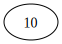

In [21]:
# Create an instance of ArbreAVL
avl_tree = ArbreAVL()

# ajout nodes into the AVL tree
avl_tree = avl_tree.ajout(10)
dot = avl_tree.visualiser_arbre()
dot



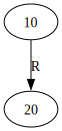

In [22]:

avl_tree = avl_tree.ajout(20)
dot = avl_tree.visualiser_arbre()
dot

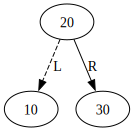

In [23]:
avl_tree = avl_tree.ajout(30)
dot = avl_tree.visualiser_arbre()
dot

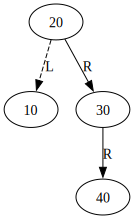

In [24]:

avl_tree = avl_tree.ajout(40)
dot = avl_tree.visualiser_arbre()
dot

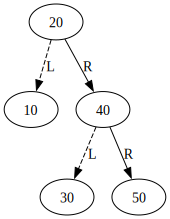

In [25]:

avl_tree = avl_tree.ajout(50)
dot = avl_tree.visualiser_arbre()
dot

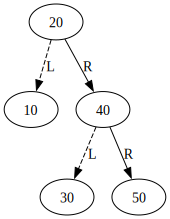

In [26]:
# Create an instance of ArbreAVL
avl_tree = ArbreAVL()

# ajout nodes into the AVL tree
avl_tree = avl_tree.ajout_liste([10, 20, 30, 40, 50])
# avl_tree.ajout(10)
# avl_tree.ajout(20)
# avl_tree.ajout(30)
# avl_tree.ajout(40)
# avl_tree.ajout(50)


# # supprime a node from the AVL tree
# avl_tree.supprime(40)

# # # recherche for a node in the AVL tree
# print(avl_tree.recherche(30))  # Output: True
# print(avl_tree.recherche(40))  # Output: False

# # Visualize the AVL tree
dot = avl_tree.visualiser_arbre()
dot
# dot.render('avl_tree_example', format='png', view=True)

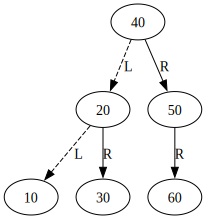

In [27]:
# ajouter un noeud à l'arbre A
A = avl_tree.ajout(60)
dot = A.visualiser_arbre()
dot

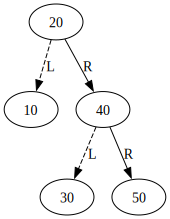

In [28]:
# non modifie 
dot = avl_tree.visualiser_arbre()
dot

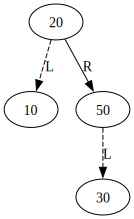

In [29]:

A = avl_tree.supprime(40)
dot = A.visualiser_arbre()
dot

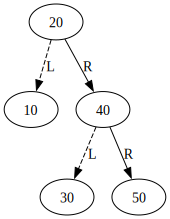

In [30]:
dot = avl_tree.visualiser_arbre()
dot

In [31]:

print(A.recherche(30))  # Output: True
print(A.recherche(40))  # Output: False

True
False


In [32]:

print(avl_tree.recherche(30))  # Output: True
print(avl_tree.recherche(40))  # Output: True

True
True
